In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
from scipy.optimize import curve_fit
import matplotlib as mpl
import nc_time_axis
mpl.rcParams['figure.dpi']= 500

In [13]:
model1 = '/media/rakshith/Seagate Expansion Drive/Good models/CESM2-WACCM/SST/*.nc'
cesm = xr.open_mfdataset(model1)

model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/SST/*.nc'
cmcc = xr.open_mfdataset(model2)

model3 = '/media/rakshith/Seagate Expansion Drive/Good models/INM-CM5-0/SST/*.nc'
inm = xr.open_mfdataset(model3)

model4 = '/media/rakshith/Seagate Expansion Drive/Good models/MIROC6/SST/*.nc'
miroc = xr.open_mfdataset(model4)

model5 = '/media/rakshith/Seagate Expansion Drive/Good models/NESM3/SST/*.nc'
nesm = xr.open_mfdataset(model5)

model6 = '/media/rakshith/Seagate Expansion Drive/Good models/BCC-CSM2-MR/SST/*.nc'
bcc = xr.open_mfdataset(model6)

model7 = '/media/rakshith/Seagate Expansion Drive/Good models/E3SM-1-0/SST/*.nc'
e3sm = xr.open_mfdataset(model7)

model8 = '/media/rakshith/Seagate Expansion Drive/Good models/GFDL-ESM4/SST/*.nc'
gfdl = xr.open_mfdataset(model8)

#model9 = '/media/rakshith/Seagate Expansion Drive/Good models/IPSL-CM6A-LR/SST/*.nc'
#ipsl = xr.open_mfdataset(model9)

model10 = '/media/rakshith/Seagate Expansion Drive/Good models/MRI-ESM2-0/SST/*.nc'
mri = xr.open_mfdataset(model10)

#model11 = '/media/rakshith/Seagate Expansion Drive/Good models/KACE-1-0-G/SST/*.nc'
#kace = xr.open_mfdataset(model11)

model12 = '/media/rakshith/Seagate Expansion Drive/Good models/E3SM-1-1-ECA/SST/*.nc'
eca = xr.open_mfdataset(model12)

/home/rakshith/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'ts' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [20]:
models = [cesm, cmcc, inm, miroc, nesm, bcc, gfdl, mri, eca]
names = ['CESM-WACCM', 'CMCC-CM2-SR5', 'INM-CM5-0', 'MIROC6', 'NESM3', 'BCC-CSM2-MR', 'GFDL-ESM4', 'MRI-ESM2-0', 'E3SM-1-1-ECA']

In [15]:
lat1, lat2, lon1, lon2 = 10, 30, 70, 90

Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done


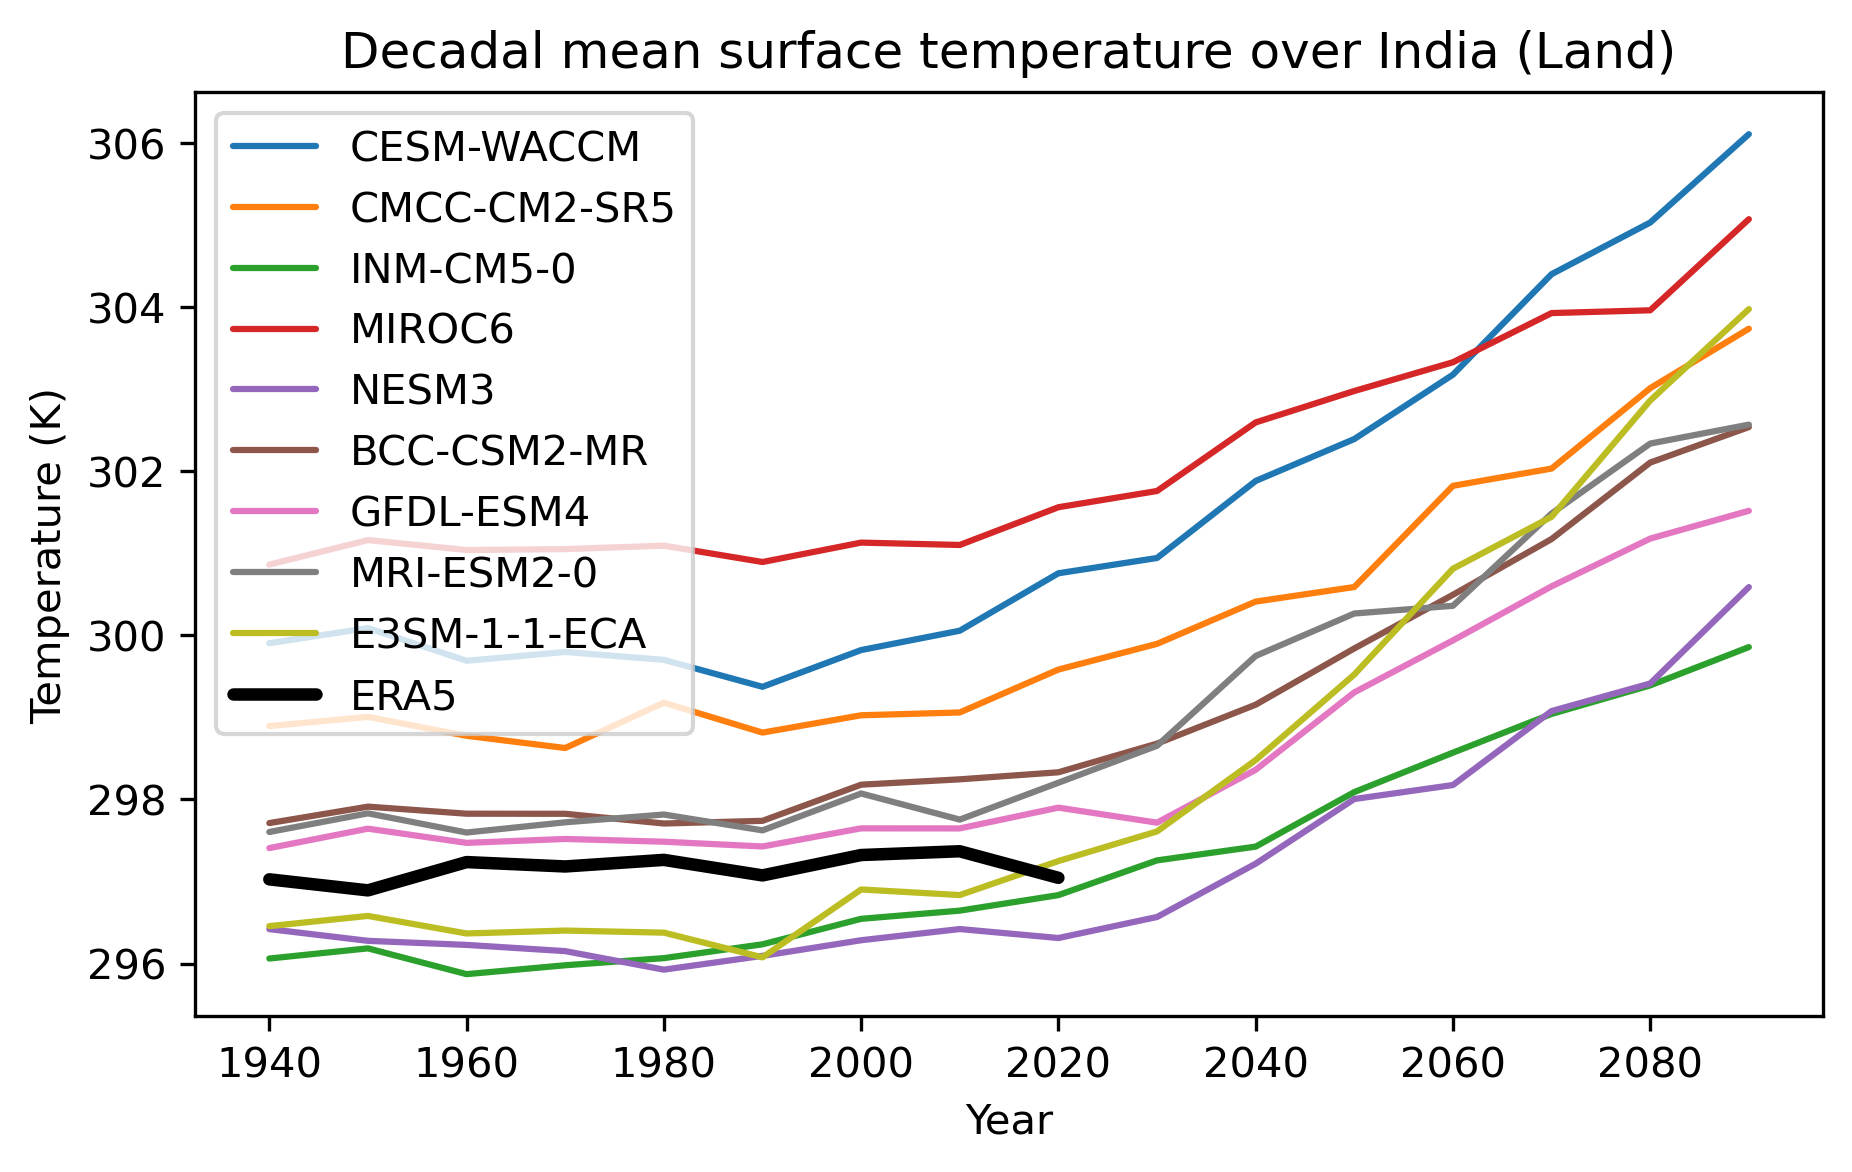

In [30]:
plt.rcParams['figure.figsize'] = [7,4]
X = np.arange(1940, 2100, 10)
for j in range(len(models)):
    i = models[j]
    clim = i.resample(time="10AS").mean()
    clim2 = clim.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2), time = slice('1940', '2090')) #for regional
    #clim2 = clim.sel(time=slice('1850', '2090')) #for global
    
    l=[]
    for k in clim2.lon:
        if k>180:
            l.append(k-360)
        else:
            l.append(k)
            
    lon_grid, lat_grid = np.meshgrid(l, clim2.lat)
    mask = globe.is_land(lat_grid, lon_grid)
    
    temp = clim2.ts.where(mask>0).mean(dim=['lat', 'lon']).squeeze()
    plt.plot(X, temp, label=names[j], solid_capstyle='round')
    plt.legend()
    print('Model 1 done')

plt.plot(X1, grid2, c='black', label='ERA5', lw=3, solid_capstyle='round')
plt.ylabel('Temperature (K)')
plt.xlabel('Year')
plt.title('Decadal mean surface temperature over India (Land)')
plt.legend()

In [5]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA Skin temp.nc'
ds = xr.open_dataset(a)

In [6]:
clim = ds.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

In [7]:
lon_grid, lat_grid = np.meshgrid(clim.longitude, clim.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [8]:
grid1 = clim.skt.where(mask>0).mean(dim=['latitude', 'longitude']).squeeze()

In [9]:
grid2 = grid1.resample(time="10AS").mean('time')

In [10]:
X1 = np.arange(1940, 2021, 10)

# Global SST

In [17]:
gsst = np.array([278.223  , 278.11264, 278.14606, 278.1567 , 278.57968, 278.66562,
       278.95203, 279.25455, 279.3861 ])

In [18]:
X = np.arange(1940, 2100, 10)

Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done
Model 1 done


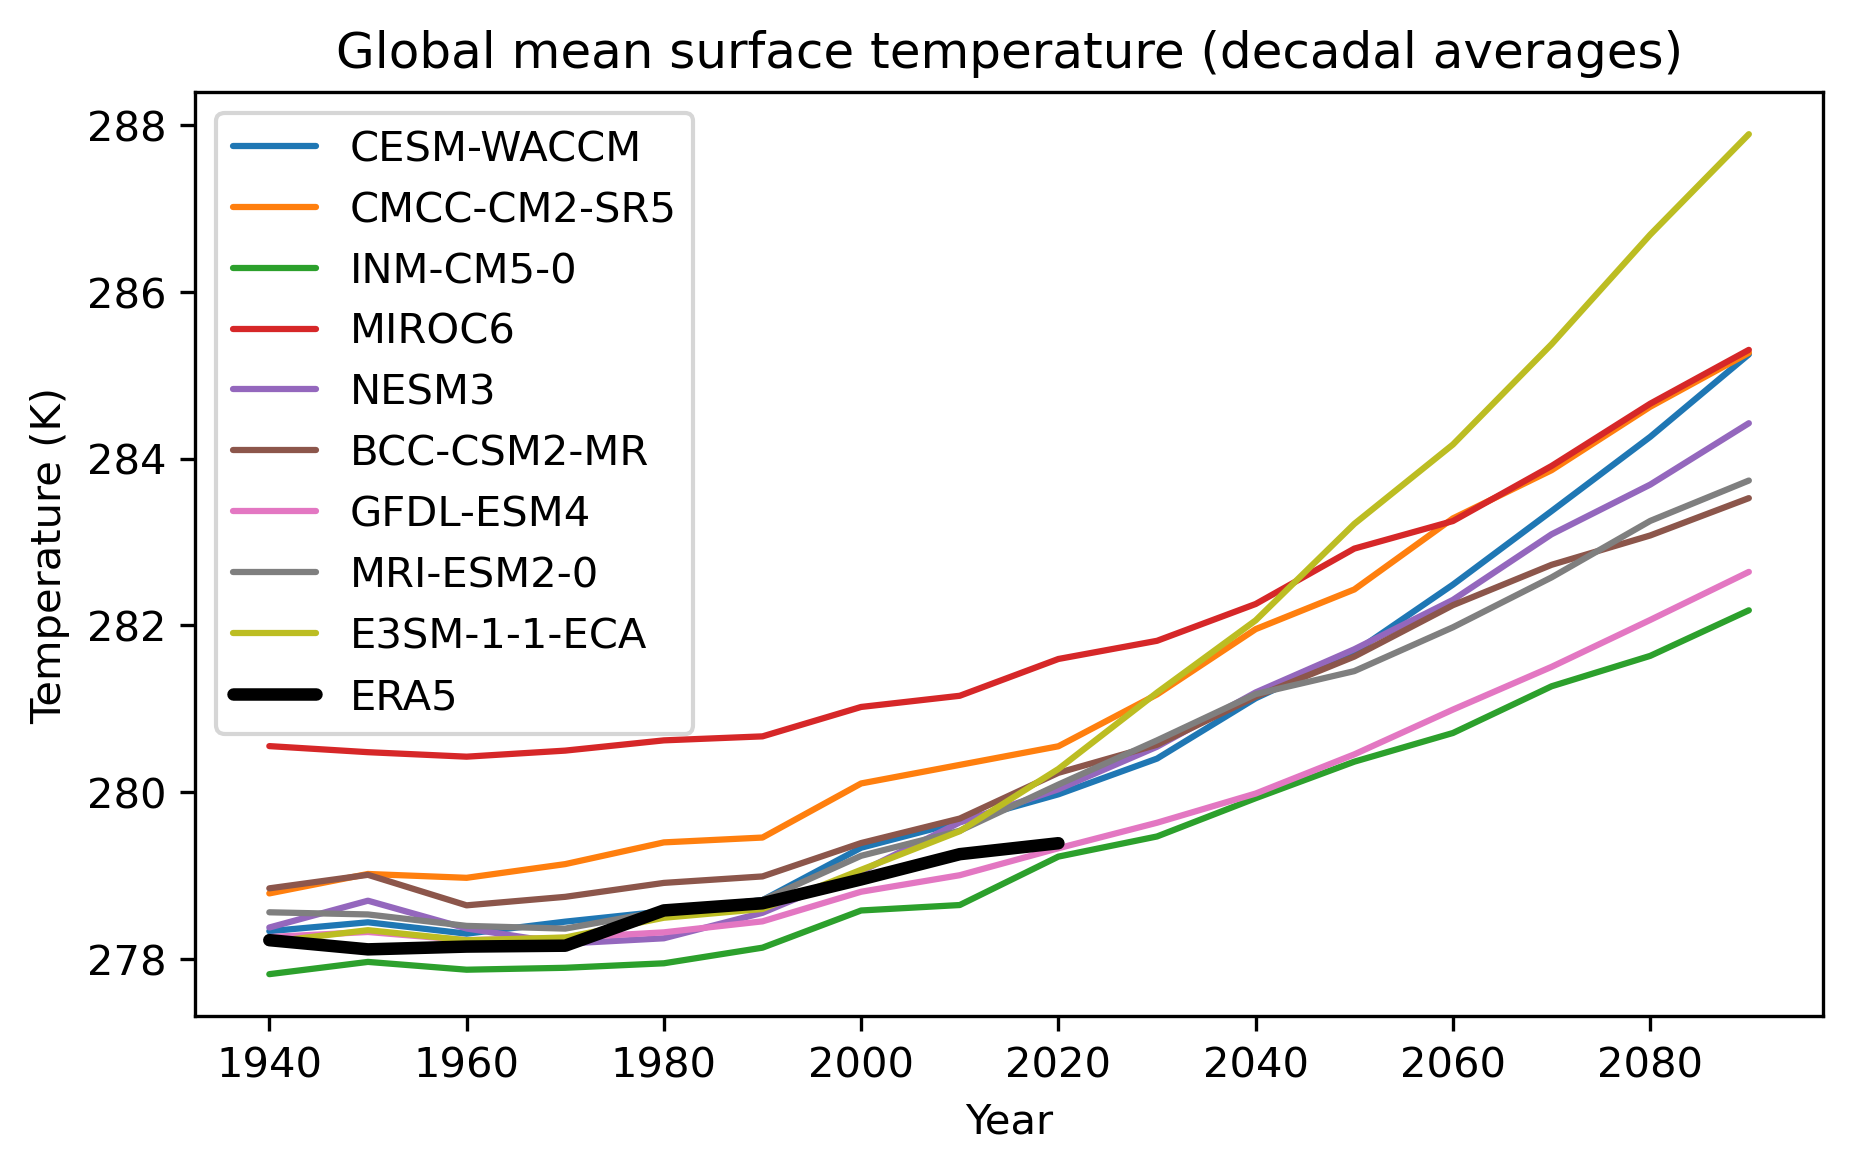

In [29]:
for j in range(len(models)):
    i = models[j]
    clim = i.resample(time="10AS").mean()
    clim2 = clim.sel(time=slice('1940', '2090')) #for global

    temp = clim2.ts.mean(dim=['lat', 'lon']).squeeze()
    plt.plot(X, temp, label=names[j], solid_capstyle='round')
    plt.legend()
    print('Model 1 done')

plt.plot(X1, gsst, c='black', label='ERA5', lw=3, solid_capstyle='round')
plt.ylabel('Temperature (K)')
plt.xlabel('Year')
plt.title('Global mean surface temperature (decadal averages)')
plt.legend()